In [238]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product

from sklearn.metrics import recall_score, accuracy_score
## define bucket in which you are trying to reach
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)

## define csv file to read in the bucket
file_key= 'churn-bigml-80.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
telecom_train = pd.read_csv(file_content_stream)
telecom_train.head()

## disabling the 'FutureWarning' warning message
import warnings
warnings.simplefilter(action = 'ignore', category = 'SettingWithCopyWarning')

telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [239]:
from matplotlib import pyplot as plt

In [240]:
## retreiving the testing dataset
## define csv file to read in the bucket
file_key= 'churn-bigml-20.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
telecom_test = pd.read_csv(file_content_stream)
telecom_test.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [241]:
## creating Churn_numb variable where true = 1, false = 0
telecom_train['Churn_numb'] = np.where(telecom_train['Churn'] == False, 0, 1)
telecom_test['Churn_numb'] = np.where(telecom_test['Churn'] == False, 0, 1)

In [242]:
## changing 'International_plan' from categorical to numerical (Yes = 1; No = 0) in both datasets
telecom_train['International_plan'] = np.where(telecom_train['International_plan'] == 'No', 0, 1)
telecom_test['International_plan'] = np.where(telecom_test['International_plan'] == 'No', 0, 1)

In [243]:
## changing 'Voice_mail_plan' from categorical to numerical (Yes = 1; No = 0) in both datasets
telecom_train['Voice_mail_plan'] = np.where(telecom_train['Voice_mail_plan'] == 'No', 0, 1)
telecom_test['Voice_mail_plan'] = np.where(telecom_test['Voice_mail_plan'] == 'No', 0, 1)

In [244]:
## creating 'total_charge' variable in both data frames
telecom_train = telecom_train.assign(total_charge = telecom_train['Total_day_charge'] + telecom_train['Total_eve_charge'] + telecom_train['Total_night_charge'] + telecom_train['Total_intl_charge'])
telecom_test = telecom_test.assign(total_charge = telecom_test['Total_day_charge'] + telecom_test['Total_eve_charge'] + telecom_test['Total_night_charge'] + telecom_test['Total_intl_charge'])

telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Churn_numb,total_charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,75.56
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,59.24
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,62.29
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0,66.80
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0,52.09


In [245]:
## keeping the following variables ONLY in both datasets: Account_length, International_plan, Voice_mail_plan, total_charge, 
## Customer_service_calls, and Churn
telecom_train = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 
                              'Churn_numb']]
telecom_test = telecom_test[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls', 
                              'Churn_numb']]

In [246]:
## definng input and target variables in training dataset
X = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn_numb']

In [198]:
## feature importance (considering telecom_train datasets); 1000 times
rf_results = list()
ada_results = list()
gb_results = list()

for i in range (0,1000):
    
    print(i)
    
    ## splitting the telecom_training dataset into 80% training and 20% testing, stratify = Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)
    
    ## creating models
    rf_md = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_train, Y_train)
    ada_md = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 500, learning_rate = 0.01).fit(X_train, Y_train)
    gb_md = GradientBoostingClassifier(max_depth = 3, n_estimators = 500, learning_rate = 0.01).fit(X_train, Y_train)

    ## extracting the importances
    rf_importances = rf_md.feature_importances_
    ada_importances = ada_md.feature_importances_
    gb_importances = gb_md.feature_importances_
    
    ## appending results to a list
    rf_results.append(rf_importances)
    ada_results.append(ada_importances)
    gb_results.append(gb_importances)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [199]:
## creating dataframe to store results
rf_importances_df = pd.DataFrame(rf_results, columns = ['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls'])
ada_importances_df = pd.DataFrame(ada_results, columns = ['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls'])
gb_importances_df = pd.DataFrame(gb_results, columns = ['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls'])
rf_importances_df

,Account_length,International_plan,Voice_mail_plan,total_charge,Customer_service_calls
0,0.021684,0.127239,0.073092,0.565689,0.212295
1,0.018913,0.130205,0.076328,0.545085,0.229469
2,0.018391,0.127306,0.077968,0.590954,0.185381
3,0.020308,0.137103,0.068896,0.557169,0.216524
4,0.017620,0.135394,0.072467,0.563467,0.211052
...,...,...,...,...,...
995,0.020440,0.115202,0.068753,0.570018,0.225587
996,0.019181,0.159794,0.069840,0.541131,0.210054
997,0.020312,0.141294,0.069074,0.576249,0.193070
998,0.022095,0.131300,0.072850,0.565853,0.207902


In [200]:
## 
averages = pd.DataFrame(rf_importances_df.mean(axis = 0), columns = ['rf'])
averages['ada'] = pd.DataFrame(ada_importances_df.mean(axis = 0), columns = ['ada'])
averages['gb'] = pd.DataFrame(gb_importances_df.mean(axis = 0), columns = ['gb'])
averages

,rf,ada,gb
Account_length,0.019686,0.300362,0.015352
International_plan,0.143648,0.249643,0.117403
Voice_mail_plan,0.073457,0.035414,0.132240
total_charge,0.554615,0.342105,0.571637
Customer_service_calls,0.208595,0.072476,0.163368


In [201]:
averages.mean(axis = 1)

Account_length            0.111800
International_plan        0.170231
Voice_mail_plan           0.080370
total_charge              0.489452
Customer_service_calls    0.148146
dtype: float64

from the above results, I will not use average voice mail plan (lowest silhouette score)

In [247]:
## creating dictionary that contains all the combinations of trees and depths
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], columns = dictionary.keys())
dictionary_1 = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7]}
parameters_1 = expand_grid(dictionary_1)
parameters_1

,n_tree,depth
0,100,3
1,100,5
2,100,7
3,500,3
4,500,5
5,500,7
6,1000,3
7,1000,5
8,1000,7
9,1500,3


In [248]:
## dictionary 2
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], columns = dictionary.keys())
dictionary_2 = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7], 'learning_rate':[0.1, 0.01, 0.001]}
parameters_2 = expand_grid(dictionary_2)

In [249]:
## dictionary 3
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], columns = dictionary.keys())
dictionary_3 = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7], 'learning_rate':[0.1, 0.01, 0.001]}
parameters_3 = expand_grid(dictionary_3)

In [250]:
## defining input variables to be used for this model
X_rf = telecom_train[['Account_length', 'International_plan', 'total_charge', 'Customer_service_calls']]

## defining a dataframe to hold results
md1_recall_dataframe = pd.DataFrame(columns = np.arange(parameters_1.shape[0]))
md1_accuracy_dataframe = pd.DataFrame(columns = np.arange(parameters_1.shape[0]))

md2_recall_dataframe = pd.DataFrame(columns = np.arange(parameters_2.shape[0]))
md2_accuracy_dataframe = pd.DataFrame(columns = np.arange(parameters_2.shape[0]))

md3_recall_dataframe = pd.DataFrame(columns = np.arange(parameters_3.shape[0]))
md3_accuracy_dataframe = pd.DataFrame(columns = np.arange(parameters_3.shape[0]))

## creating 100 iteration loop

for k in range(0, 100):
    
    print(k)
    
    ## defining lists to store accuracy and recall results
    md1_recall = []
    md1_accuracy = []
    
    md2_recall = []
    md2_accuracy = []
    
    md3_recall = []
    md3_accuracy = []
    
    ## splitting the data
    X_training, X_testing, Y_training, Y_testing = train_test_split(X_rf, Y, test_size = 0.2, stratify = Y)
    
    ## building random forest model
    
    for i in range(0, parameters_1.shape[0]):
        
        #print(i)
        
        ## builiding random forest model
        md1 = RandomForestClassifier(n_estimators = parameters_1['n_tree'][i], 
                                     max_depth = parameters_1['depth'][i]).fit(X_training, Y_training)
        
        ## predicting on the testing dataset
        md1_preds = md1.predict_proba(X_testing)[:, 1]
      
        ## changing likelihoods to labels
        md1_labels = np.where(md1_preds < 0.1, 0, 1)
        
        ## computing recall and accuracy score
        md1_recall_score = recall_score(Y_testing, md1_labels)
        md1_accuracy_score = accuracy_score(Y_testing, md1_labels)
        
        #print(md1_recall_score)
        
        ## appending recall and accuracy scores to list
        md1_recall.append(md1_recall_score)
        md1_accuracy.append(md1_accuracy_score)
        
        #print(md1.get_params())
        
        ## changing list to dataframe
        md1_recall_df = pd.DataFrame([md1_recall])
        md1_accuracy_df = pd.DataFrame([md1_accuracy])
      
    ## appending scores to dataframe
    md1_recall_dataframe = md1_recall_dataframe.append(md1_recall_df, ignore_index = True)
    md1_accuracy_dataframe = md1_accuracy_dataframe.append(md1_accuracy_df, ignore_index = True)
    
    
    ## building adaboost model
    
    for i in range(0, parameters_2.shape[0]):
       
        md2 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = parameters_2['depth'][i]), 
                             n_estimators = parameters_2['n_tree'][i], 
                             learning_rate = parameters_2['learning_rate'][i]).fit(X_training, Y_training)
    
        ## predicting on the testing dataset
        md2_preds = md2.predict_proba(X_testing)[:, 1]
        
        ## changing likelihoods to labels
        md2_labels = np.where(md2_preds < 0.1, 0, 1)
        
        ## computing recall and accuracy score
        md2_recall_score = recall_score(Y_testing, md2_labels)
        md2_accuracy_score = accuracy_score(Y_testing, md2_labels)
        
        ## appending recall and accuracy scores to a list
        md2_recall.append(md2_recall_score)
        md2_accuracy.append(md2_accuracy_score)
    
        ## changing list to a dataframe
        md2_recall_df = pd.DataFrame([md2_recall])
        md2_accuracy_df = pd.DataFrame([md2_accuracy])
        
    ## appending results to a dataframe
    md2_recall_dataframe = md2_recall_dataframe.append(md2_recall_df, ignore_index = True)
    md2_accuracy_dataframe = md2_accuracy_dataframe.append(md2_accuracy_df, ignore_index = True)
    
    
    ## buidling gradient boosting model
    
    for i in range(0, parameters_3.shape[0]):
        
        md3 = GradientBoostingClassifier(n_estimators = parameters_3['n_tree'][i], max_depth = parameters_3['depth'][i], 
                                     learning_rate = parameters_3['learning_rate'][i]).fit(X_training, Y_training)
        
        ## predicting on the testing dataset
        md3_preds = md3.predict_proba(X_testing)[:, 1]
        
        ## changing likelihoods to labels
        md3_labels = np.where(md3_preds < 0.1, 0, 1)
        
        ## computing recall and accuracy score
        md3_recall_score = recall_score(Y_testing, md3_labels)
        md3_accuracy_score = accuracy_score(Y_testing, md3_labels)
        
        ## appending recall and accuracy scores to a list
        md3_recall.append(md3_recall_score)
        md3_accuracy.append(md3_accuracy_score)
        
        ## changing list to a dataframe
        md3_recall_df = pd.DataFrame([md3_recall])
        md3_accuracy_df = pd.DataFrame([md3_accuracy])
    
    ## appending results to a dataframe
    md3_recall_dataframe = md3_recall_dataframe.append(md3_recall_df, ignore_index = True)
    md3_accuracy_dataframe = md3_accuracy_dataframe.append(md3_accuracy_df, ignore_index = True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [251]:
md1_recall_dataframe
md1_accuracy_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.861423,0.880150,0.883895,0.861423,0.883895,0.885768,0.861423,0.883895,0.885768,0.861423,0.887640,0.885768,0.861423,0.882022,0.885768
1,0.833333,0.835206,0.872659,0.831461,0.855805,0.870787,0.833333,0.853933,0.872659,0.833333,0.846442,0.870787,0.833333,0.855805,0.870787
2,0.859551,0.880150,0.885768,0.859551,0.882022,0.887640,0.859551,0.882022,0.887640,0.859551,0.880150,0.887640,0.859551,0.880150,0.887640
3,0.865169,0.876404,0.893258,0.865169,0.887640,0.895131,0.865169,0.885768,0.889513,0.865169,0.889513,0.895131,0.865169,0.887640,0.893258
4,0.859551,0.887640,0.885768,0.857678,0.887640,0.887640,0.857678,0.887640,0.887640,0.857678,0.887640,0.887640,0.857678,0.887640,0.887640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.876404,0.898876,0.898876,0.876404,0.898876,0.895131,0.876404,0.898876,0.897004,0.876404,0.898876,0.897004,0.876404,0.897004,0.897004
96,0.880150,0.908240,0.913858,0.880150,0.900749,0.911985,0.880150,0.904494,0.913858,0.880150,0.893258,0.913858,0.880150,0.891386,0.915730
97,0.872659,0.895131,0.900749,0.872659,0.895131,0.904494,0.872659,0.898876,0.900749,0.872659,0.898876,0.904494,0.872659,0.897004,0.902622
98,0.876404,0.900749,0.900749,0.874532,0.900749,0.900749,0.874532,0.902622,0.900749,0.874532,0.902622,0.900749,0.874532,0.900749,0.900749


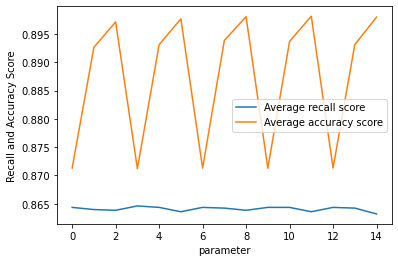

In [253]:
## visualizing recall and accuracy results
md1_recall_avgs = pd.DataFrame(md1_recall_dataframe.mean())
md1_recall_avgs
md1_accuracy_avgs = pd.DataFrame(md1_accuracy_dataframe.mean())
plt.plot(md1_recall_avgs, label = 'Average recall score')
plt.plot(md1_accuracy_avgs, label = 'Average accuracy score')
plt.xlabel('parameter')
plt.ylabel('Recall and Accuracy Score')
plt.legend(loc = 'center right')

In [65]:
## printing the optimal parameters to use for the random forest model
print('the best parameters to use for the random forest model has n_tree =',parameters_1['n_tree'][2],' and max_depth =', parameters_1['depth'][2],
    )

the best parameters to use for the random forest model has n_tree = 100  and max_depth = 7


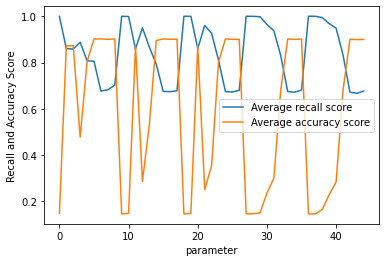

In [254]:
## visualizing recall and accuracy results
md2_recall_avgs = pd.DataFrame(md2_recall_dataframe.mean())
md2_recall_avgs
md2_accuracy_avgs = pd.DataFrame(md2_accuracy_dataframe.mean())
plt.plot(md2_recall_avgs, label = 'Average recall score')
plt.plot(md2_accuracy_avgs, label = 'Average accuracy score')
plt.xlabel('parameter')
plt.ylabel('Recall and Accuracy Score')
plt.legend(loc = 'center right')

In [63]:
## printing the optimal parameters to use for the ada boosting model
print('the best parameters to use for the ada boosting model has n_tree =',parameters_2['n_tree'][1],', max_depth =', parameters_2['depth'][1],
    ', and learning_rate =', parameters_2['learning_rate'][1])

the best parameters to use for the ada boosting model has n_tree = 100 , max_depth = 3 , and learning_rate = 0.01


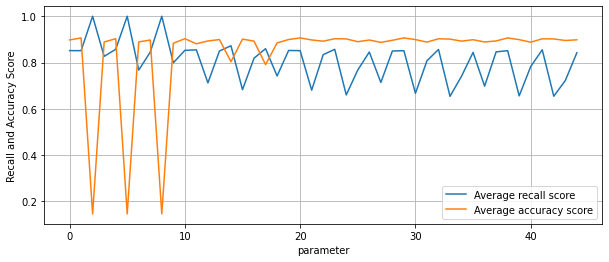

In [255]:
## visualizing recall and accuracy results
md3_recall_avgs = pd.DataFrame(md3_recall_dataframe.mean())
md3_recall_avgs
md3_accuracy_avgs = pd.DataFrame(md3_accuracy_dataframe.mean())
plt.figure(figsize = (10,4))
plt.grid()
plt.plot(md3_recall_avgs, label = 'Average recall score')
plt.plot(md3_accuracy_avgs, label = 'Average accuracy score')
plt.xlabel('parameter')
plt.ylabel('Recall and Accuracy Score')
plt.legend(loc = 'lower right')

In [77]:
## printing the optimal parameters to use for the gradient boosting model
print('the best parameters to use for the gradient boosting model has n_tree =',parameters_3['n_tree'][2],', max_depth =', parameters_3['depth'][2],
    ', and learning_rate =', parameters_3['learning_rate'][2])

the best parameters to use for the gradient boosting model has n_tree = 100 , max_depth = 3 , and learning_rate = 0.001


In [74]:
## creating a dataframe to store results
predictions = pd.DataFrame()

## build models with best parameters

X_test_final = telecom_test[['Account_length', 'International_plan', 'total_charge', 'Customer_service_calls']]
Y_test_final = telecom_test['Churn_numb']

## building the models
final_rf = RandomForestClassifier(n_estimators = 100, max_depth= 7).fit(X_rf, Y)
final_ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), 
                             n_estimators = 100, learning_rate = 0.01).fit(X_rf, Y)
final_gb = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, learning_rate = 0.001).fit(X_rf, Y)
                               
                             
## predicting on the testing dataset
final_rf_preds = final_rf.predict_proba(X_test_final)[:, 1]
final_ada_preds = final_ada.predict_proba(X_test_final)[:, 1]
final_gb_preds = final_gb.predict_proba(X_test_final)[:, 1]

## appending predictions to a single dataframe
predictions['rf preds'] = pd.DataFrame(final_rf_preds, columns = ['rf preds'])
predictions['ada preds'] = pd.DataFrame(final_ada_preds, columns = ['ada preds'])
predictions['gb preds'] = pd.DataFrame(final_gb_preds, columns = ['gb preds'])

## calculating averages 
predictions['avgs'] = predictions.mean(axis = 1)

## changing likelihoods to labels (using 10% cuttoff)
predictions['labels'] = np.where(predictions['avgs'] < 0.1, 0, 1)

## calculating recall and accuracy
final_recall_score = recall_score(Y_test_final, predictions['labels'])
final_accuracy_score = accuracy_score(Y_test_final, predictions['labels'])

In [75]:
predictions.head()

,rf preds,ada preds,gb preds,avgs,labels
0,0.027061,0.090145,0.134104,0.083770,0
1,0.966979,0.625059,0.227021,0.606353,1
2,0.865287,0.981731,0.224811,0.690610,1
3,0.018351,0.090145,0.134104,0.080867,0
4,0.028433,0.090145,0.134104,0.084227,0


In [76]:
print('The aggregated recall score is', final_recall_score, 'and the aggregated accuracy score is', final_accuracy_score)

The aggregated recall score is 0.8842105263157894 and the aggregated accuracy score is 0.8620689655172413
